# **1️⃣ Import dataset IoT (CSV)**

In [7]:
import gdown

url = 'https://drive.google.com/file/d/1kZ42n69ZuNsyU4Hj3UmRWjc7WFunc08F/view'
output = 'dataset.csv'

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1kZ42n69ZuNsyU4Hj3UmRWjc7WFunc08F
To: c:\Users\Karol\ITB\lomba\sic\stage3\SIC-Stage3\dataset.csv
100%|██████████| 9.36k/9.36k [00:00<00:00, 9.37MB/s]


'dataset.csv'

In [8]:
import pandas as pd

df = pd.read_csv("dataset.csv", sep=';')
df

,timestamp,temperature,humidity,label
0,2025-11-14 03:33:05.264373,28.99,83.49,Normal
1,2025-11-14 03:34:05.264373,26.45,51.92,Normal
2,2025-11-14 03:35:05.264373,29.59,67.74,Normal
3,2025-11-14 03:36:05.264373,33.09,80.67,Panas
4,2025-11-14 03:37:05.264373,26.06,70.99,Normal
...,...,...,...,...
195,2025-11-14 06:48:05.264373,28.54,70.71,Normal
196,2025-11-14 06:49:05.264373,23.46,66.18,Dingin
197,2025-11-14 06:50:05.264373,27.61,68.92,Normal
198,2025-11-14 06:51:05.264373,27.23,66.37,Normal


# **2️⃣ Train-Test Split**


In [9]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'humidity']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# **3️⃣ Pilih 2 Model untuk Dibandingkan**
*   Decision Tree 🌳
*   KNN 🔍




In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


# **4️⃣ Training + Evaluasi Akurasi & Confusion Matrix**


Decision Tree
              precision    recall  f1-score   support

      Dingin       1.00      1.00      1.00        10
      Normal       1.00      1.00      1.00        22
       Panas       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



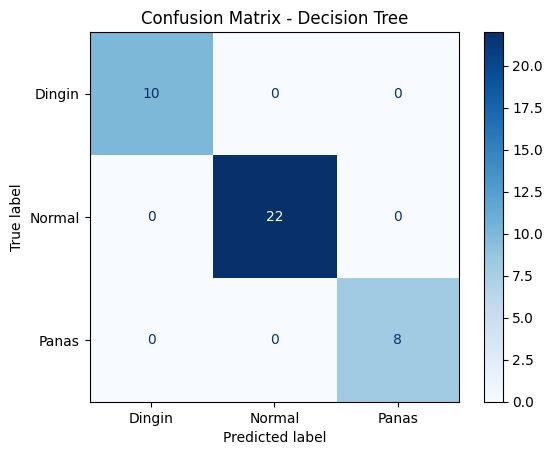


KNN
              precision    recall  f1-score   support

      Dingin       1.00      0.90      0.95        10
      Normal       0.91      0.95      0.93        22
       Panas       0.88      0.88      0.88         8

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.93        40



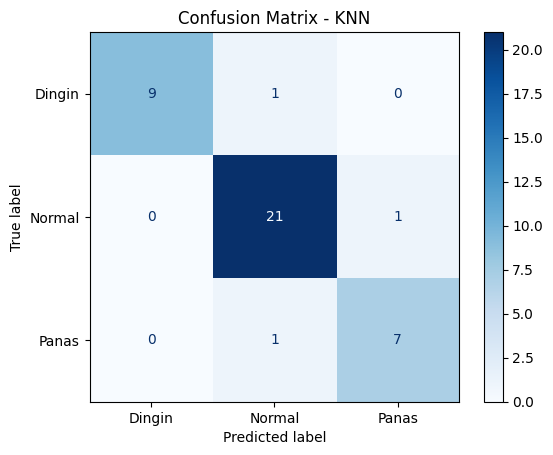

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Decision Tree memiliki performa sempurna dengan semua metrik bernilai 1.0. KNN memiliki performa yang sedikit lebih buruk yakni f1-macro 0.92. Pembentukan cabang-cabang pada Decision Tree dapat menentukan batas-batas yang lebih jelas untuk menentukan suhu yang tepat berdasarkan suhu dan kelembaban yang diberikan. KNN memiliki kelemahan yakni sistem voting pemilihan kelas di antara K tetangga dapat memberikan bias ke arah vote kelas terbanyak. Dengan demikian, model Decision Tree lebih cocok untuk early warning system IoT suhu ruang server

In [12]:
# export the best model to pickle
import joblib
best_model = models["Decision Tree"]
joblib.dump(best_model, "iot_temp_model.pkl")

['iot_temp_model.pkl']